In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load data
train_data = np.loadtxt('train.txt')
test_data = np.loadtxt('test.txt')

# Split data into inputs (x_{i-1}, v_{i-1}) and targets (x_i, v_i)
train_input = torch.tensor(train_data[:-1, :], dtype=torch.float32)
train_target = torch.tensor(train_data[1:, :], dtype=torch.float32)
test_input = torch.tensor(test_data[:-1, :], dtype=torch.float32)
test_target = torch.tensor(test_data[1:, :], dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(train_input, train_target)
test_dataset = TensorDataset(test_input, test_target)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Implementation of SympNet

In [8]:
import torch.nn as nn
import torch.optim as optim

class SympNet(nn.Module):
    def __init__(self):
        super(SympNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss function, and optimizer
sympnet = SympNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(sympnet.parameters(), lr=1e-3)

# Training loop
epochs = 100
for epoch in range(epochs):
    sympnet.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = sympnet(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {train_loss/len(train_loader)}")


Epoch 1, Loss: 0.292928093423446
Epoch 2, Loss: 0.03581187602443
Epoch 3, Loss: 0.006690567242912948
Epoch 4, Loss: 0.002643161977175623
Epoch 5, Loss: 0.0023921682635166994
Epoch 6, Loss: 0.002214855184623351
Epoch 7, Loss: 0.002050431949707369
Epoch 8, Loss: 0.0019461781387993444
Epoch 9, Loss: 0.0018126699190664415
Epoch 10, Loss: 0.001683235483748528
Epoch 11, Loss: 0.0015581059609151755
Epoch 12, Loss: 0.0014771419907143961
Epoch 13, Loss: 0.0013793157074057187
Epoch 14, Loss: 0.0012853270018240437
Epoch 15, Loss: 0.001196555177254292
Epoch 16, Loss: 0.0011188850039616227
Epoch 17, Loss: 0.0010592033625774395
Epoch 18, Loss: 0.000983723077903657
Epoch 19, Loss: 0.0009088687535646992
Epoch 20, Loss: 0.000854137821685678
Epoch 21, Loss: 0.0007979783113114536
Epoch 22, Loss: 0.0007428437578103816
Epoch 23, Loss: 0.0006960549362702295
Epoch 24, Loss: 0.000646558650866306
Epoch 25, Loss: 0.0006139968269659827
Epoch 26, Loss: 0.0005621065502054989
Epoch 27, Loss: 0.0005229013671244805
E

# Evaluate sympnet

In [9]:
# Prediction and evaluation
sympnet.eval()
with torch.no_grad():
    predictions = sympnet(test_input)
    mse = criterion(predictions, test_target).item()
    print(f"Test MSE: {mse}")




Test MSE: 5.42204943485558e-05


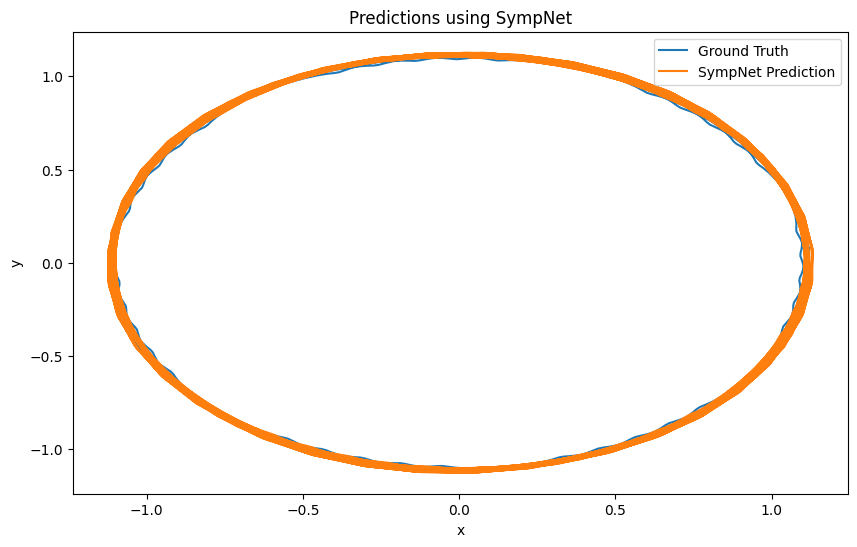

In [10]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test_target[:, 0].cpu().numpy(), test_target[:, 1].cpu().numpy(), label='Ground Truth')
plt.plot(predictions[:, 0].cpu().numpy(), predictions[:, 1].cpu().numpy(), label='SympNet Prediction')
plt.title('Predictions using SympNet')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Implementing PNNs

Epoch 1, Loss: 0.2732106503099203
Epoch 2, Loss: 0.03939755175573131
Epoch 3, Loss: 0.007515136695777376
Epoch 4, Loss: 0.0022151572823834917
Epoch 5, Loss: 0.0018442555010551587
Epoch 6, Loss: 0.0017267786073110376
Epoch 7, Loss: 0.0016338877030648291
Epoch 8, Loss: 0.0015399383652644854
Epoch 9, Loss: 0.0014657208181840058
Epoch 10, Loss: 0.001389396963835073
Epoch 11, Loss: 0.001316303639517476
Epoch 12, Loss: 0.0012372438213787973
Epoch 13, Loss: 0.0011749620074018214
Epoch 14, Loss: 0.0011395151377655566
Epoch 15, Loss: 0.0010955567461981748
Epoch 16, Loss: 0.001023489441043542
Epoch 17, Loss: 0.0009723140198426942
Epoch 18, Loss: 0.0009258468562620692
Epoch 19, Loss: 0.0008928152019507252
Epoch 20, Loss: 0.0008460494621734446
Epoch 21, Loss: 0.0008114765369100496
Epoch 22, Loss: 0.0007766850782597127
Epoch 23, Loss: 0.0007342031021835282
Epoch 24, Loss: 0.0007126837808755226
Epoch 25, Loss: 0.0006759437504418505
Epoch 26, Loss: 0.0006389050395227969
Epoch 27, Loss: 0.000620385059

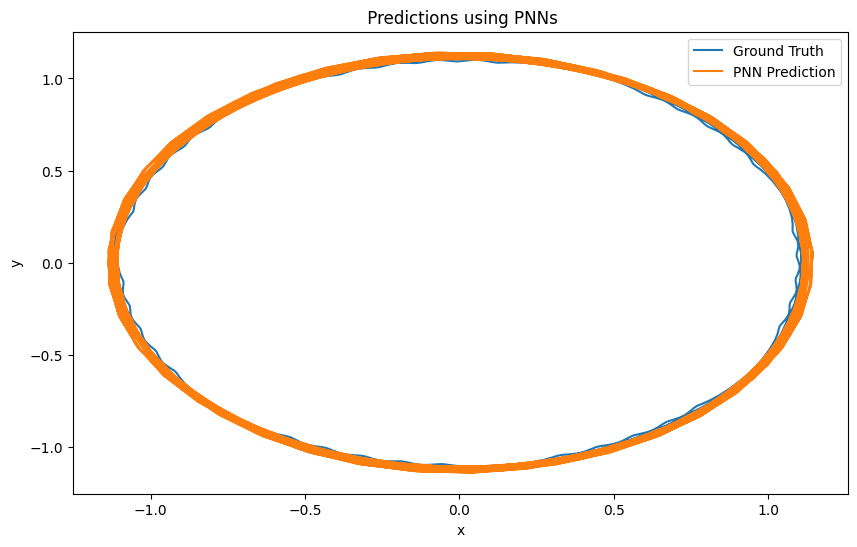

In [7]:
class PNN(nn.Module):
    def __init__(self):
        super(PNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)
        
    def forward(self, x):
        x = torch.sin(self.fc1(x))  # Using sine activation to ensure smooth periodicity
        x = torch.sin(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss function, and optimizer
pnn = PNN()
optimizer = optim.Adam(pnn.parameters(), lr=1e-3)

# Training loop (same as SympNet)
for epoch in range(epochs):
    pnn.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = pnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {train_loss/len(train_loader)}")

# Prediction and evaluation
pnn.eval()
with torch.no_grad():
    predictions = pnn(test_input)
    mse = criterion(predictions, test_target).item()
    print(f"Test MSE: {mse}")

# Plot results
plt.figure(figsize=(10, 6))
plt.title(" Predictions using PNNs")
plt.plot(test_target[:, 0].numpy(), test_target[:, 1].numpy(), label='Ground Truth')
plt.plot(predictions[:, 0].numpy(), predictions[:, 1].numpy(), label='PNN Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Implementation of PINNs

Epoch 1, Loss: 0.9393333271145821
Epoch 2, Loss: 0.270595936725537
Epoch 3, Loss: 0.0746448317853113
Epoch 4, Loss: 0.029349853672708075
Epoch 5, Loss: 0.009460210509132594
Epoch 6, Loss: 0.003731645110140865
Epoch 7, Loss: 0.002382379689758333
Epoch 8, Loss: 0.001801017831894569
Epoch 9, Loss: 0.0014206712658051401
Epoch 10, Loss: 0.00114567134733079
Epoch 11, Loss: 0.00098025107824166
Epoch 12, Loss: 0.0008358912091352977
Epoch 13, Loss: 0.000714900512927367
Epoch 14, Loss: 0.0006377920775169817
Epoch 15, Loss: 0.0005667690735814782
Epoch 16, Loss: 0.0005268282620818354
Epoch 17, Loss: 0.00048154448328811367
Epoch 18, Loss: 0.00044983901049514924
Epoch 19, Loss: 0.00041757897148878936
Epoch 20, Loss: 0.0003981083148876981
Epoch 21, Loss: 0.000386518272231721
Epoch 22, Loss: 0.00036510391388825764
Epoch 23, Loss: 0.00034453235881907557
Epoch 24, Loss: 0.00033186606378876604
Epoch 25, Loss: 0.00032233187691114534
Epoch 26, Loss: 0.0003137085950584151
Epoch 27, Loss: 0.00029227182979714

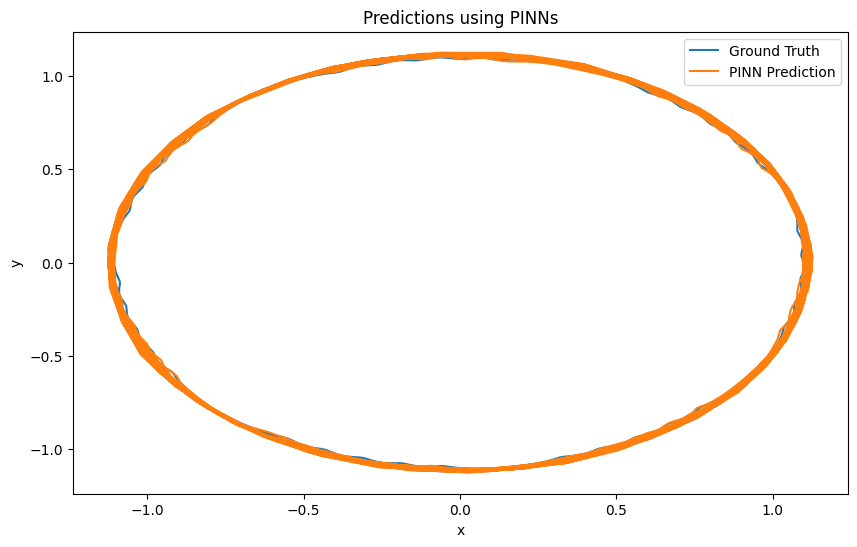

In [12]:
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)
        self.m = nn.Parameter(torch.tensor(1.0))  # Learnable mass parameter
        self.q = nn.Parameter(torch.tensor(1.0))  # Learnable charge parameter
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
    
    def loss(self, outputs, targets):
        # PINN loss includes both MSE and physics-based constraints
        mse_loss = criterion(outputs, targets)
        # Add physics-based constraints (example: Lorentz force equation)
        physics_loss = torch.mean((self.m * outputs[:, :2] - self.q * targets[:, :2])**2)
        return mse_loss + physics_loss

# Initialize model, optimizer
pinn = PINN()
optimizer = optim.Adam(pinn.parameters(), lr=1e-3)

# Training loop
for epoch in range(epochs):
    pinn.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = pinn(inputs)
        loss = pinn.loss(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {train_loss/len(train_loader)}")

# Prediction and evaluation
pinn.eval()
with torch.no_grad():
    predictions = pinn(test_input)
    mse = criterion(predictions, test_target).item()
    print(f"Test MSE: {mse}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test_target[:, 0].numpy(), test_target[:, 1].numpy(), label='Ground Truth')
plt.plot(predictions[:, 0].numpy(), predictions[:, 1].numpy(), label='PINN Prediction')
plt.title('Predictions using PINNs')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Simulate the video

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio
import os

pnn.name = 'PNN'
sympnet.name = 'Sympnet'
pinn.name = 'Pinn'


def simulate_trajectory(model, initial_state, steps=300):
    model.eval()  # Set the model to evaluation mode
    trajectory = [initial_state.cpu().numpy()]  # Start with the initial state

    state = initial_state  # Set the initial state
    with torch.no_grad():
        for _ in range(steps):
            # Predict the next state using the model
            state = model(state.unsqueeze(0)).squeeze(0)  # Forward pass
            trajectory.append(state.cpu().numpy())  # Store the state

    return np.array(trajectory)  # Convert to a NumPy array

# Define the initial state
initial_state = test_input[0]  
ground_truth = test_target.cpu().numpy()


def create_frame(trajectory, ground_truth, step, filename, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(ground_truth[:step, 0], ground_truth[:step, 1], label='Ground Truth', color='red', linestyle='dashed')
    plt.plot(trajectory[:step, 0], trajectory[:step, 1], label='Prediction', color='blue')
    plt.title(f"Trajectory prediction using {model_name.name}, Step {step}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.savefig(filename)
    plt.close()

def generate_video(model, ground_truth, initial_state):
    frames = []
    trajectory = simulate_trajectory(model, initial_state)
    for step in range(1, len(trajectory)):
        filename = f'frame_{step}.png'
        create_frame(trajectory, ground_truth, step, filename, model)
        frames.append(imageio.imread(filename))
    rgb_frames = [frame[:, :, :3] for frame in frames]  # Remove the alpha channel
    # Create video from RGB frames
    video_filename = f'particle_trajectory_{model.name}.mp4'
    imageio.mimsave(video_filename, rgb_frames, fps=10, codec='libx264')  # Use mp4 and H.264 codec

    # Optionally, clean up image files
    for step in range(1, len(trajectory)):
        filename = f'frame_{step}.png'
        os.remove(filename)


In [35]:
generate_video(sympnet, ground_truth, initial_state)
generate_video(pnn, ground_truth, initial_state)
generate_video(pinn, ground_truth, initial_state)

C:\Users\sysad\AppData\Local\Temp\ipykernel_19592\4218945526.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [24]:



# Create video from RGB frames
video_filename = 'particle_trajectory.mp4'
imageio.mimsave(video_filename, rgb_frames, fps=10, codec='libx264')  # Use mp4 and H.264 codec

# Optionally, clean up image files
for step in range(1, len(sympnet_trajectory)):
    filename = f'frame_{step}.png'
    os.remove(filename)

In [15]:
! pip install imageio[pyav]


  Obtaining dependency information for av from https://files.pythonhosted.org/packages/ff/d3/4b0fddcd54d0a88ee7e035f239ebb56ce139fac8e02ee0942c43746a66ff/av-12.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/26.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.0 MB 435.7 kB/s eta 0:01:00
   ---------------------------------------- 0.1/26.0 MB 558.5 kB/s eta 0:00:47
   ---------------------------------------- 0.1/26.0 MB 798.9 kB/s eta 0:00:33
   ---------------------------------------- 0.2/26.0 MB 1.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/26.0 MB 1.4 MB/s eta 0:00:19
    --------------------------------------- 0.5/26.0 MB 1.8 MB/s eta 0:00:14
   - -------------------------------------- 0.8/26.0 MB 2.6 MB/s eta 0:00:10
   - -------------------------------------- 1.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
